In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
N = 100
n_trials = 100000
n_succ_10 = 0
n_succ_55 = 0

# Generate a random sample of size "steps" with bernouille distribution
def bernouille(steps=N, p=0.5):
  """
  Args: size: denoting the number of steps taken by the random walker

  Returns: X: python list
  """
  X = np.random.rand(steps)
  X[X>=p] = 1
  X[X<p] = -1
  return X

# Answer 2.1.1

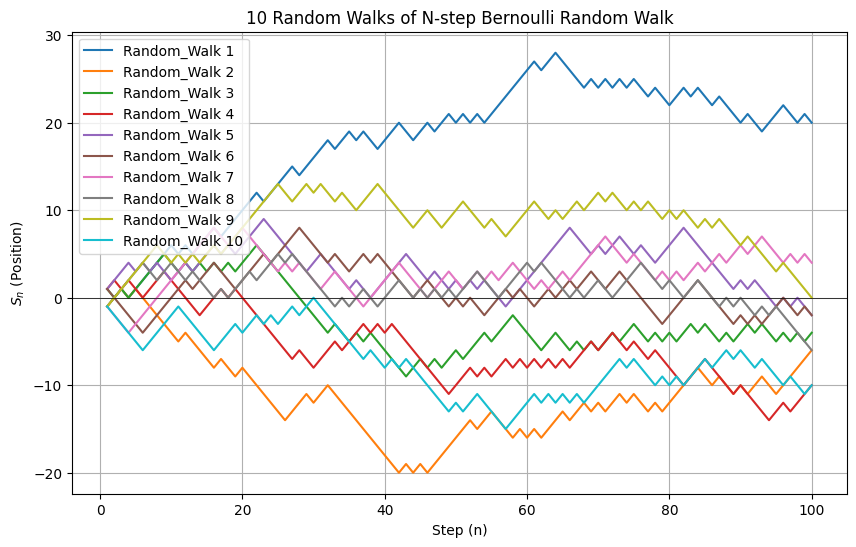

In [5]:
# Generate 10 Random Walk Visualization

# Parameters
num_random_walks = 10  # Number of random walk realizations

# Simulate the random walk for each sequence
random_walks = []
for _ in range(num_random_walks):
    # Generate N random steps (+1 or -1 with equal probability)
    steps = bernouille(N)

    # Compute cumulative sum of steps (S_n)
    S_n = np.cumsum(steps)

    # Append the cumulative sum for this realization
    random_walks.append(S_n)

# Plot the sequences of S_n as a function of n
plt.figure(figsize=(10, 6))
for i, S_n in enumerate(random_walks):
    plt.plot(range(1, N+1), S_n, label=f'Random_Walk {i+1}')

plt.title(f'{len(random_walks)} Random Walks of N-step Bernoulli Random Walk')
plt.xlabel('Step (n)')
plt.ylabel('$S_n$ (Position)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

# Answer 2.1.2

In [6]:
# Run for "n_trials" trials
def mc_sampling(n_trails,  threshold=10):
  n_succ = 0
  N = 100 # Number of Steps
  for i in range(n_trials):
    X = bernouille(N)
    sum = np.sum(X) # Here we take the sum after the last step
    if sum>threshold:
      n_succ+=1
  return n_succ/n_trials

prob = mc_sampling(n_trials)
print("Probability of the success of 10 steps: {:5E}".format(prob))

Probability of the success of 10 steps: 1.353500E-01


# Answer 2.1.3

In [102]:
def mc_importance_sampling(n_trials, threshold=55):
  # Parameters
  N = 100  # Number of steps
  #n_trials = 10**5  # Number of Monte Carlo trials
  n_trials = 10**5  # Number of Monte Carlo trials

  # Original probability P(X_j = 1) = P(X_j = -1) = 0.5
  p_original = 0.50

  # Importance sampling bias: bias towards more +1 steps to make S large
  p_biased = 0.70  # Probability of X_j = 1 in biased distribution

  # Monte Carlo estimation using importance sampling
  weights = []
  samples = []

  for _ in range(n_trials):
      # Sampling from a biased distribution with more inclination towards the +1 values.
      steps = bernouille(N, p=1-p_biased)

      # Compute S = sum of steps
      S = np.sum(steps)

      # Compute weight w = product of (P_original / P_biased) for each step
      # weight = np.prod([p_original / p_biased if step == 1 else (1 - p_original) / (1 - p_biased) for step in steps])
      weight = np.prod([p_original / p_biased if step == 1 else (1 - p_original) / (1 - p_biased) for step in steps])

      # Store the weight and append the samples list
      weights.append(weight)
      samples.append(S)

  # Estimate P(S > 55) using importance sampling
  succ = [1 if S > threshold else 0 for S in samples]
  estimate = np.mean(np.array(succ) * np.array(weights))
  return estimate


estimate = mc_importance_sampling(n_trials)
print(f"Expected value of P(S > 55) using importance sampling: {estimate}")


Expected value of P(S > 55) using importance sampling: 8.057137280126985e-09


# Answer 2.1.5

In [ ]:
# Parameters
n_trials = 100000  # Number of trials for each estimate
n_replications = 1000  # Number of independent replicates
p_threshold = 0.30
true_p_10 = 0.136
true_p_55 = 7.944598e-9

# Storage for confidence interval results
ci_10 = []
ci_55 = []
contains_true_10 = 0
contains_true_55 = 0

# Monte Carlo Simulation
for _ in range(n_replications):
    # Simulate Bernoulli walk: X = 1 with p > 0.30, X = -1 with p < 0.30 for importance sampling part
    # Compute the probability
    p_hat_10 = mc_sampling(n_trials, threshold=10)
    p_hat_55 = mc_importance_sampling(n_trials, threshold=55)

    # Standard error
    se_10 = np.sqrt(p_hat_10 * (1 - p_hat_10) / n_trials)
    se_55 = np.sqrt(p_hat_55 * (1 - p_hat_55) / n_trials)

    # Confidence intervals
    ci_10.append((p_hat_10 - 1.96 * se_10, p_hat_10 + 1.96 * se_10))
    ci_55.append((p_hat_55 - 1.96 * se_55, p_hat_55 + 1.96 * se_55))

    # Check if the true value is within the confidence interval
    if ci_10[-1][0] <= true_p_10 <= ci_10[-1][1]:
        contains_true_10 += 1
    if ci_55[-1][0] <= true_p_55 <= ci_55[-1][1]:
        contains_true_55 += 1

# Report results
print(f"Number of intervals containing true P(S > 10): {contains_true_10}/{n_replications}")
print(f"Number of intervals containing true P(S > 55): {contains_true_55}/{n_replications}")


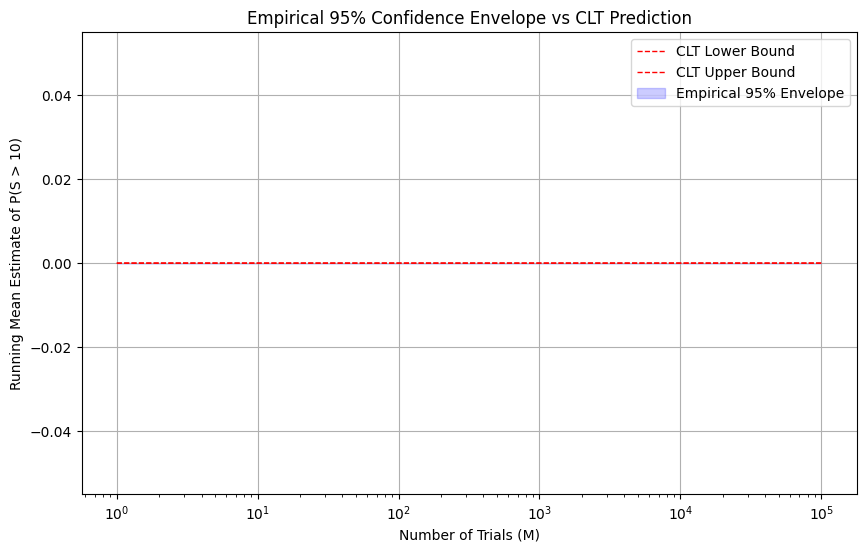

In [113]:
# Parameters
N_trials = 10**5  # Number of Monte Carlo trials
N_steps = 100  # Number of steps in the random walk
L = 10  # Threshold for S > 10
N_replicates = 1000  # Number of independent replicates
z_alpha_half = 1.96

# Function to simulate the random walk
def simulate_random_walk(N_steps, N_trials):
    # Simulate N_steps for each trial, with steps -1 or +1 with equal probability
    steps = np.random.choice([-1, 1], size=(N_trials, N_steps))
    S = np.sum(steps, axis=1)  # Sum steps for each trial
    return S

# Function to compute the running mean
def running_mean(sequence):
    return np.cumsum(sequence) / np.arange(1, len(sequence) + 1)

# Run the simulation 1000 times and store running means
running_means = np.zeros((N_replicates, N_trials))

for i in range(N_replicates):
    # Simulate random walk
    S = simulate_random_walk(N_steps, N_trials)
    # Compute indicator for S > L
    indicator = (S > L).astype(float)
    # Compute running mean of the indicator
    running_means[i, :] = running_mean(indicator)

# Compute empirical envelope (95% confidence interval bounds)
lower_bound = np.percentile(running_means, 2.5, axis=0)
upper_bound = np.percentile(running_means, 97.5, axis=0)

# Compute the theoretical CLT-based confidence interval bounds
p_estimate_clt = np.mean(S > L)  # Theoretical probability P(S > L) based on MC
se_clt = np.sqrt(p_estimate_clt * (1 - p_estimate_clt) / np.arange(1, N_trials + 1))
ci_lower_clt = p_estimate_clt - z_alpha_half * se_clt
ci_upper_clt = p_estimate_clt + z_alpha_half * se_clt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, N_trials + 1), ci_lower_clt, 'r--', label='CLT Lower Bound', linewidth=1)
plt.plot(np.arange(1, N_trials + 1), ci_upper_clt, 'r--', label='CLT Upper Bound', linewidth=1)
plt.fill_between(np.arange(1, N_trials + 1), lower_bound, upper_bound, color='blue', alpha=0.2, label='Empirical 95% Envelope')

plt.title('Empirical 95% Confidence Envelope vs CLT Prediction')
plt.xlabel('Number of Trials (M)')
plt.ylabel(f'Running Mean Estimate of P(S > {L})')
plt.legend()
plt.xscale('log')  # Logarithmic scale for better visualization
plt.grid(True)
plt.show()
